##  Dataset

https://www.kaggle.com/datasets/gustavomodelli/forest-fires-in-brazil

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [8]:
import chardet


Note: you may need to restart the kernel to use updated packages.


In [11]:
data=pd.read_csv('amazon.csv',encoding='iso-8859-1',parse_dates=['date'])

In [12]:
data

,year,state,month,number,date
0,1998,Acre,Janeiro,0.0,1998-01-01
1,1999,Acre,Janeiro,0.0,1999-01-01
2,2000,Acre,Janeiro,0.0,2000-01-01
3,2001,Acre,Janeiro,0.0,2001-01-01
4,2002,Acre,Janeiro,0.0,2002-01-01
...,...,...,...,...,...
6449,2012,Tocantins,Dezembro,128.0,2012-01-01
6450,2013,Tocantins,Dezembro,85.0,2013-01-01
6451,2014,Tocantins,Dezembro,223.0,2014-01-01
6452,2015,Tocantins,Dezembro,373.0,2015-01-01


In [13]:
data.dtypes

year               int64
state             object
month             object
number           float64
date      datetime64[ns]
dtype: object

In [16]:
data.shape

(6454, 5)

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6454 entries, 0 to 6453
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   year    6454 non-null   int64         
 1   state   6454 non-null   object        
 2   month   6454 non-null   object        
 3   number  6454 non-null   float64       
 4   date    6454 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(1), object(2)
memory usage: 252.2+ KB


In [20]:
data.head(23)

,year,state,month,number,date
0,1998,Acre,Janeiro,0.0,1998-01-01
1,1999,Acre,Janeiro,0.0,1999-01-01
2,2000,Acre,Janeiro,0.0,2000-01-01
3,2001,Acre,Janeiro,0.0,2001-01-01
4,2002,Acre,Janeiro,0.0,2002-01-01
5,2003,Acre,Janeiro,10.0,2003-01-01
6,2004,Acre,Janeiro,0.0,2004-01-01
7,2005,Acre,Janeiro,12.0,2005-01-01
8,2006,Acre,Janeiro,4.0,2006-01-01
9,2007,Acre,Janeiro,0.0,2007-01-01


In [23]:
# check for duplicates

data.duplicated().any()

True

In [26]:
data.drop_duplicates(inplace=True)

In [27]:
data.duplicated().any()

False

In [28]:
data.shape

(6422, 5)

In [30]:
6454-6422

32

In [32]:
data.describe(include='all')

,year,state,month,number,date
count,6422.000000,6422,6422,6422.000000,6422
unique,NaN,23,12,NaN,NaN
top,NaN,Rio,Agosto,NaN,NaN
freq,NaN,697,540,NaN,NaN
mean,2007.490969,NaN,NaN,108.815178,2007-06-29 10:46:40.622859008
min,1998.000000,NaN,NaN,0.000000,1998-01-01 00:00:00
25%,2003.000000,NaN,NaN,3.000000,2003-01-01 00:00:00
50%,2007.000000,NaN,NaN,24.497000,2007-01-01 00:00:00
75%,2012.000000,NaN,NaN,114.000000,2012-01-01 00:00:00
max,2017.000000,NaN,NaN,998.000000,2017-01-01 00:00:00


In [33]:
# rename onth name to english

In [34]:
data

,year,state,month,number,date
0,1998,Acre,Janeiro,0.0,1998-01-01
1,1999,Acre,Janeiro,0.0,1999-01-01
2,2000,Acre,Janeiro,0.0,2000-01-01
3,2001,Acre,Janeiro,0.0,2001-01-01
4,2002,Acre,Janeiro,0.0,2002-01-01
...,...,...,...,...,...
6449,2012,Tocantins,Dezembro,128.0,2012-01-01
6450,2013,Tocantins,Dezembro,85.0,2013-01-01
6451,2014,Tocantins,Dezembro,223.0,2014-01-01
6452,2015,Tocantins,Dezembro,373.0,2015-01-01


In [35]:
data['month'].unique()

array(['Janeiro', 'Fevereiro', 'Março', 'Abril', 'Maio', 'Junho', 'Julho',
       'Agosto', 'Setembro', 'Outubro', 'Novembro', 'Dezembro'],
      dtype=object)

In [36]:
data['Months_eng']=data['month'].map({
    'Janeiro': 'Jan', 
    'Fevereiro': 'Feb', 
    'Março': 'March', 
    'Abril': 'April', 
    'Maio': 'May', 
    'Junho': 'June', 
    'Julho': 'July',
    'Agosto': 'August', 
    'Setembro': 'Sep', 
    'Outubro': 'Oct', 
    'Novembro': 'Nov', 
    'Dezembro': 'Dec' 
})

In [37]:
data

,year,state,month,number,date,Months_eng
0,1998,Acre,Janeiro,0.0,1998-01-01,Jan
1,1999,Acre,Janeiro,0.0,1999-01-01,Jan
2,2000,Acre,Janeiro,0.0,2000-01-01,Jan
3,2001,Acre,Janeiro,0.0,2001-01-01,Jan
4,2002,Acre,Janeiro,0.0,2002-01-01,Jan
...,...,...,...,...,...,...
6449,2012,Tocantins,Dezembro,128.0,2012-01-01,Dec
6450,2013,Tocantins,Dezembro,85.0,2013-01-01,Dec
6451,2014,Tocantins,Dezembro,223.0,2014-01-01,Dec
6452,2015,Tocantins,Dezembro,373.0,2015-01-01,Dec


In [38]:
# total number of fires registered

In [39]:
data.columns

Index(['year', 'state', 'month', 'number', 'date', 'Months_eng'], dtype='object')

In [41]:
data.shape

(6422, 6)

In [42]:
#in which month maximum number of forest fires were reported

In [44]:
data.groupby('Months_eng')['number'].mean().sort_values(ascending=False)

Months_eng
July      171.278503
Oct       164.225146
August    163.056361
Nov       158.348248
Dec       112.154932
Sep       108.478343
June      103.891790
Jan        89.124942
May        65.150775
Feb        57.643084
March      57.508249
April      52.780468
Name: number, dtype: float64

<Axes: xlabel='Months_eng', ylabel='number'>

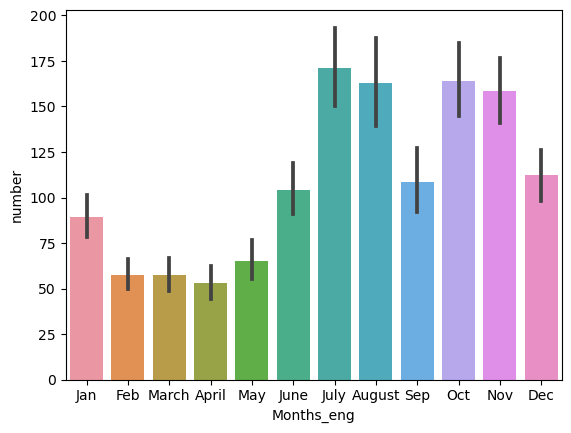

In [46]:
sns.barplot(x='Months_eng', y='number',data=data)

In [47]:
# in which year maximum number of fires are reported

In [48]:
data.groupby('year')['number'].mean().sort_values(ascending=False)

year
2003    131.977389
2016    130.284657
2015    127.186086
2012    123.718704
2017    123.714946
2014    122.287602
2009    121.102718
2004    119.040752
2002    115.403086
2010    114.313114
2013    108.783647
2005    108.040015
2011    106.893657
2006    104.718765
2007    102.572711
2008     90.956545
2001     90.512810
2000     84.417441
1999     82.971670
1998     65.835431
Name: number, dtype: float64

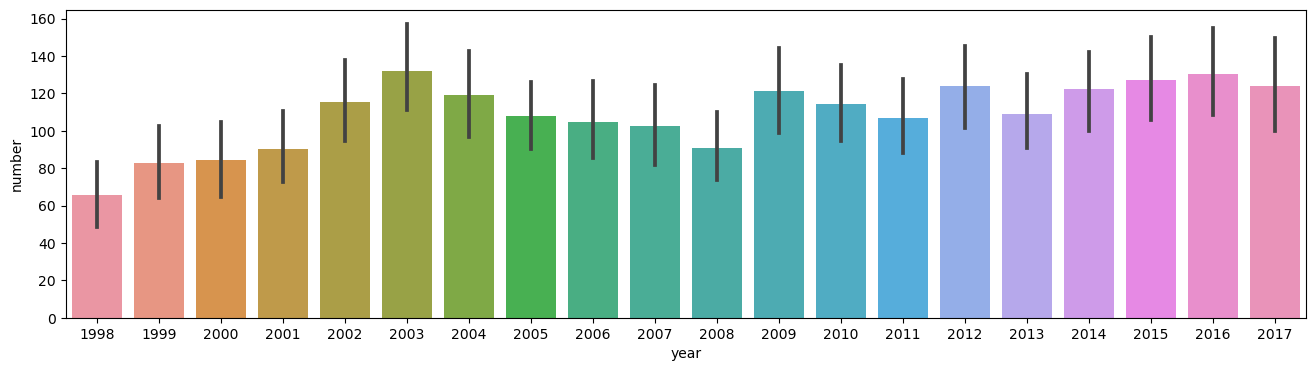

In [56]:
plt.figure(figsize=(16,4))
sns.barplot(x='year', y='number',data=data)
plt.show()

In [57]:
# in which state maximum number of forest fires were reported

In [58]:
data.columns

Index(['year', 'state', 'month', 'number', 'date', 'Months_eng'], dtype='object')

In [62]:
data.groupby('state')['number'].mean().sort_values(ascending=False).reset_index()

,state,number
0,Sao Paulo,213.896226
1,Mato Grosso,203.479975
2,Bahia,187.222703
3,Piau,158.174674
4,Goias,157.721841
5,Minas Gerais,156.800243
6,Tocantins,141.037176
7,Amazonas,128.243218
8,Ceara,127.314071
9,Paraiba,111.073979


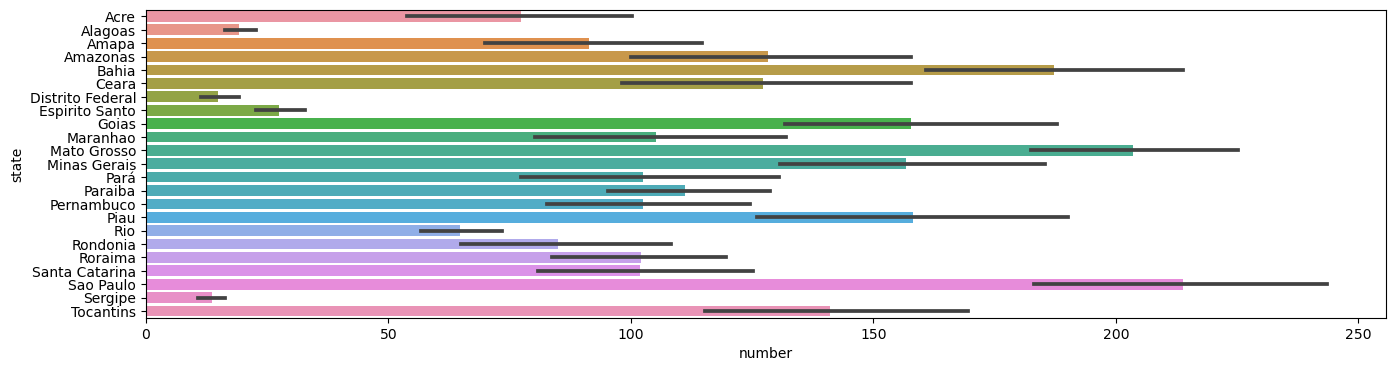

In [64]:
plt.figure(figsize=(16,4))
sns.barplot(x='number', y='state',data=data)
plt.show()

In [65]:
# find total number of fires were reported in amazonas

In [66]:
data.columns

Index(['year', 'state', 'month', 'number', 'date', 'Months_eng'], dtype='object')

In [73]:
data[data['state']=='Amazonas']['number'].sum()

30650.129

In [83]:
data1=data.groupby('state').get_group('Amazonas')

In [95]:
data2=data1.groupby('year')['number'].sum().sort_values(ascending=False).reset_index()
data2

,year,number
0,2002,2852.000
1,2008,2717.000
2,2014,2385.909
3,2010,2324.508
4,2004,2298.207
5,2016,2060.972
6,2005,1657.128
7,2011,1652.538
8,2003,1524.268
9,2009,1320.601


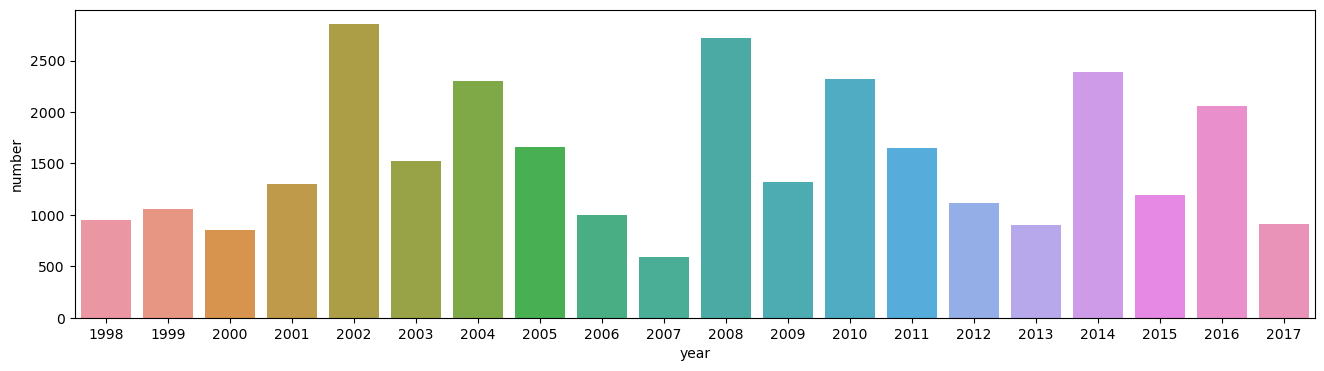

In [97]:
plt.figure(figsize=(16,4))
sns.barplot(x='year', y='number',data=data2)
plt.show()

In [98]:
# display number of fires were reported in Amazonas(Day wise)

In [99]:
data.columns

Index(['year', 'state', 'month', 'number', 'date', 'Months_eng'], dtype='object')

In [122]:
data1.columns

Index(['year', 'state', 'month', 'number', 'date', 'Months_eng'], dtype='object')

In [142]:
day=data1.groupby(data1['date'].dt.dayofweek)['number'].sum()

import calendar

day.index=[calendar.day_name[i] for i in range(0,7)]
day=day.reset_index()
day

,index,number
0,Monday,1886.601
1,Tuesday,6474.217
2,Wednesday,3910.177
3,Thursday,5754.802
4,Friday,5446.480
5,Saturday,4162.666
6,Sunday,3015.186


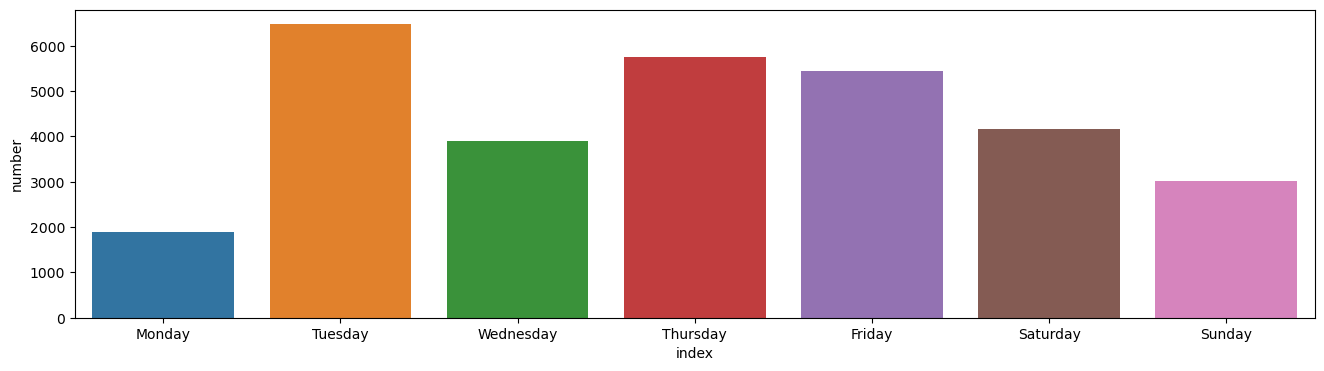

In [143]:
plt.figure(figsize=(16,4))
sns.barplot(x='index', y='number',data=day)
plt.show()

In [144]:
# find total number of fire were reported in 2015 and visualize data based on each month

In [147]:
data.groupby('year').get_group(2015)['number'].sum()

41208.292

In [157]:
fire=data[data['year']==2015].groupby('Months_eng')['number'].sum().reset_index()
fire

,Months_eng,number
0,April,2573.000
1,August,4363.125
2,Dec,4088.522
3,Feb,2309.000
4,Jan,4635.000
5,July,4364.392
6,June,3260.552
7,March,2202.000
8,May,2384.000
9,Nov,4034.518


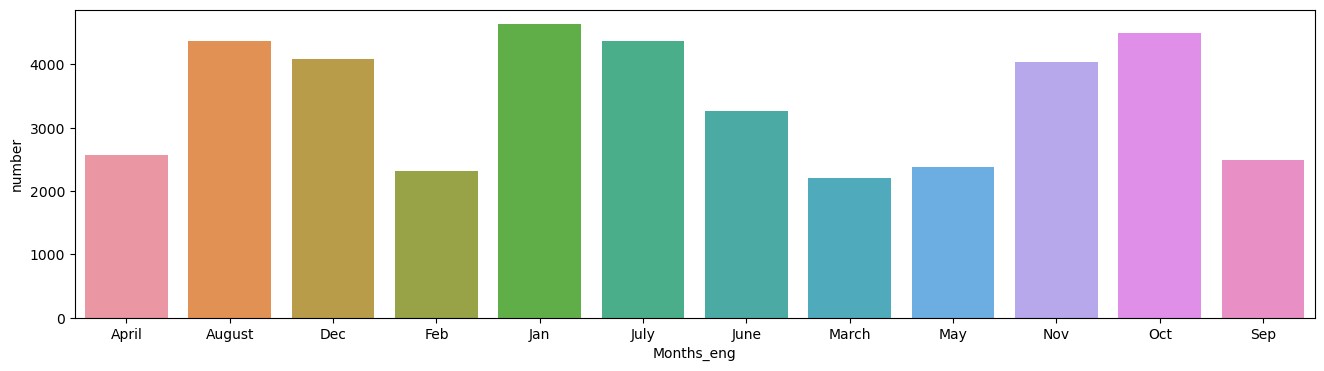

In [158]:
plt.figure(figsize=(16,4))
sns.barplot(x='Months_eng', y='number',data=fire)
plt.show()

In [159]:
# find average number of fires were reported from higest to lowest(state-wise)

In [164]:
state_wise=data.groupby('state')['number'].mean().sort_values(ascending=False).reset_index()

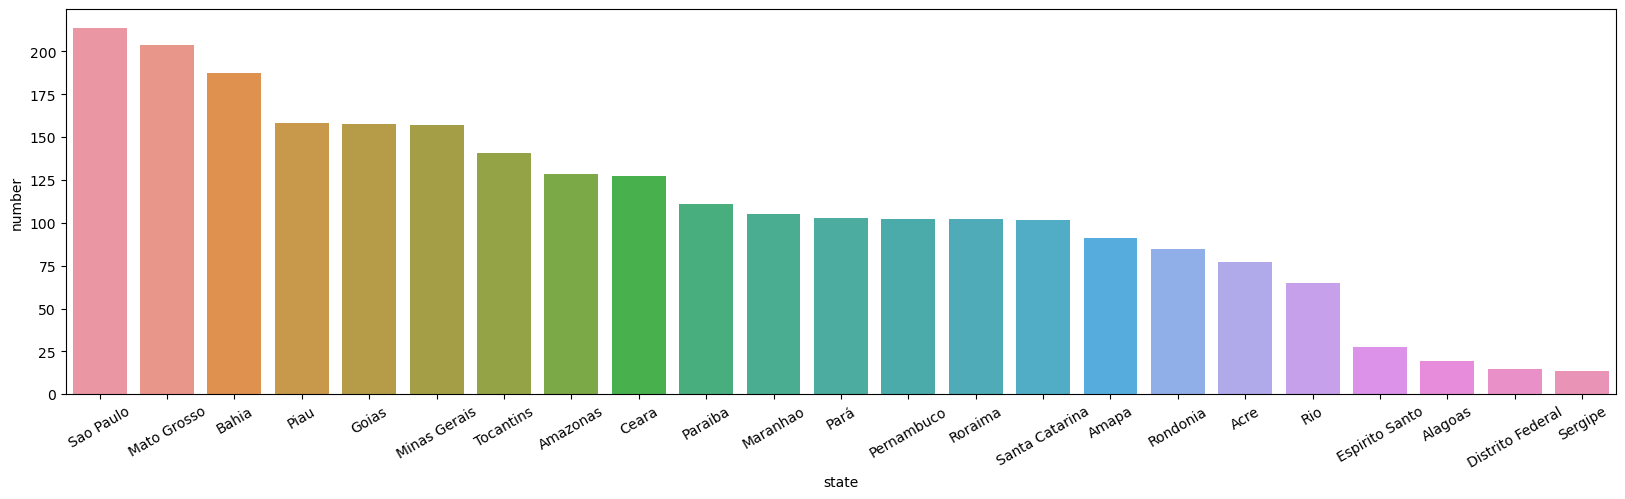

In [168]:
plt.figure(figsize=(20,5))
sns.barplot(x='state', y='number',data=state_wise)
plt.xticks(rotation=30)
plt.show()

In [169]:
#to find the state names where fires were reported in dec month

In [171]:
data.groupby('Months_eng').get_group('Dec')['state'].unique()

array(['Acre', 'Alagoas', 'Amapa', 'Amazonas', 'Bahia', 'Ceara',
       'Distrito Federal', 'Espirito Santo', 'Goias', 'Maranhao',
       'Mato Grosso', 'Minas Gerais', 'Pará', 'Paraiba', 'Pernambuco',
       'Piau', 'Rio', 'Rondonia', 'Roraima', 'Santa Catarina',
       'Sao Paulo', 'Sergipe', 'Tocantins'], dtype=object)